In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../../')
import utils

In [2]:
CALIBRATION_FILE = '../../../calibration/out/C.mat'
DATA_FILE = '../../../experiment_data/blue_feet/10/2016.10.07_00.15.13_trial_imudata.txt'

In [3]:
utils.print_header(DATA_FILE)

%  Data file recorded 2016/10/7  0:15:13
%  Stride Frequency         = [1, 1]
%  Lead In /Lead Out        = 
%  Deltas (Fractional)      = [0.25, 0.25, 0.25],[0.25, 0.25, 0.25]
%  Phase                    = 32768
%  Experiment.py 
%  Motor Gains    = [5000, 400, 200, 0, 300, 5000, 400, 200, 0, 300]



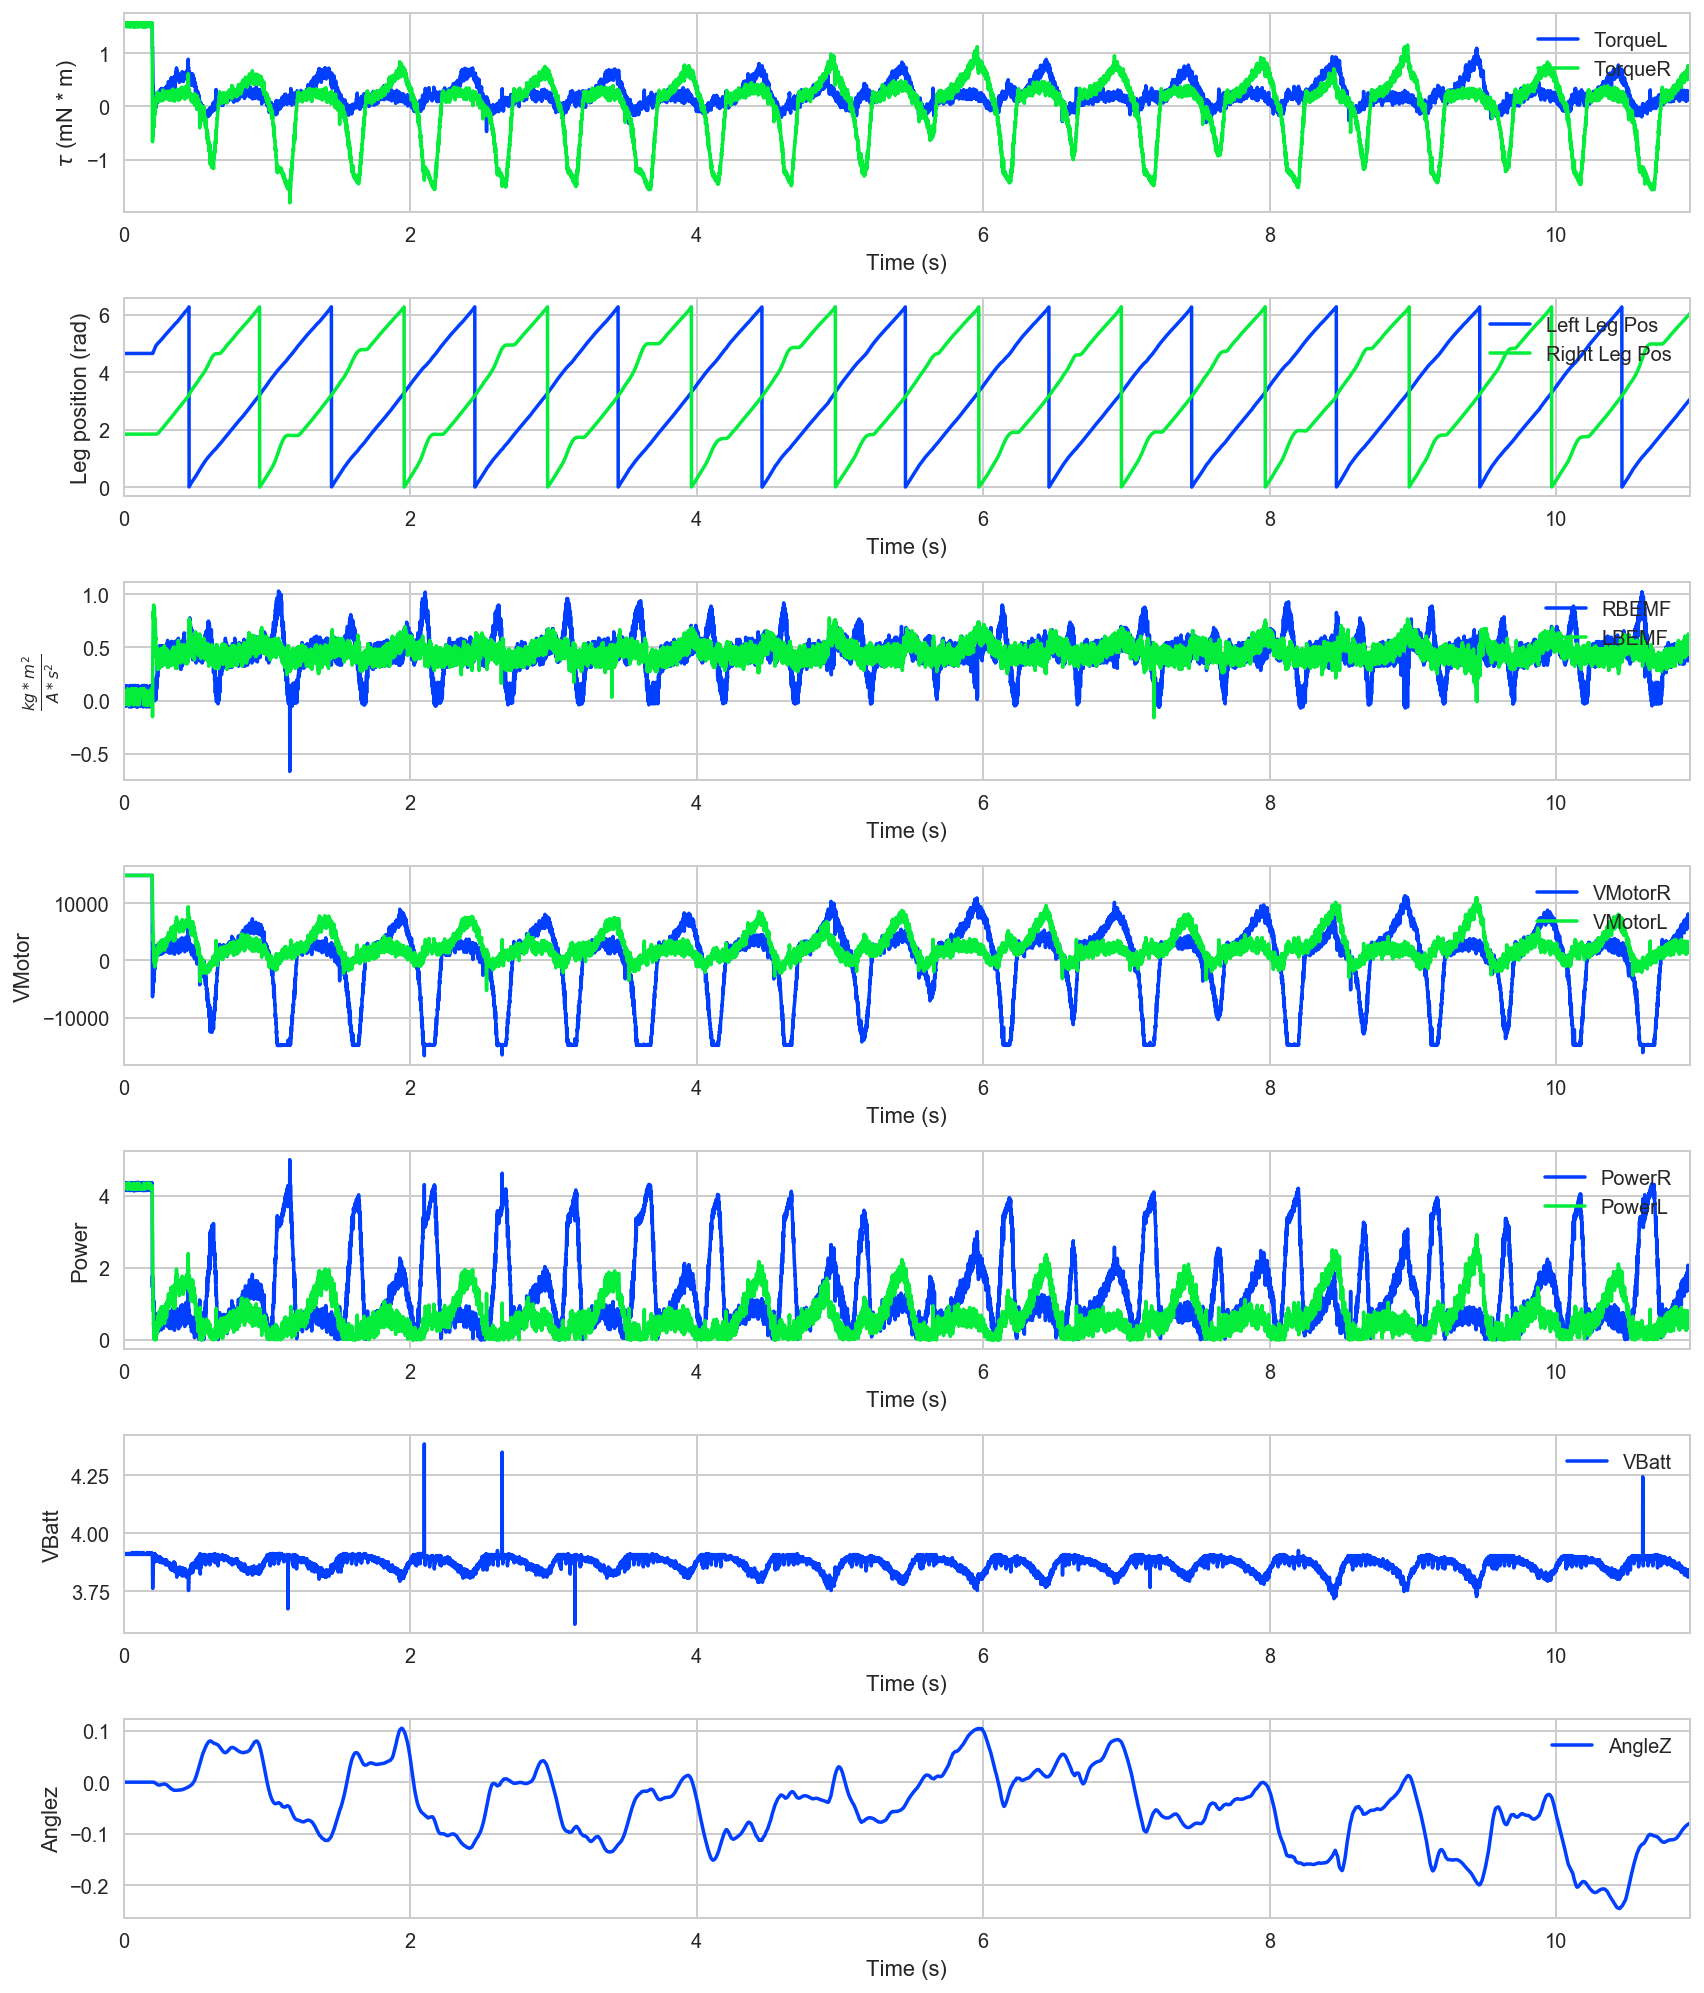

In [4]:
df = utils.process_data_files(DATA_FILE, CALIBRATION_FILE)
utils.plot_columns(df, [['TorqueL', 'TorqueR'], ['Left Leg Pos', 'Right Leg Pos'], ['RBEMF', 'LBEMF'], ['VMotorR', 'VMotorL'], ['PowerR', 'PowerL'], 'VBatt', 'AngleZ'], display=True, save_figure=False)

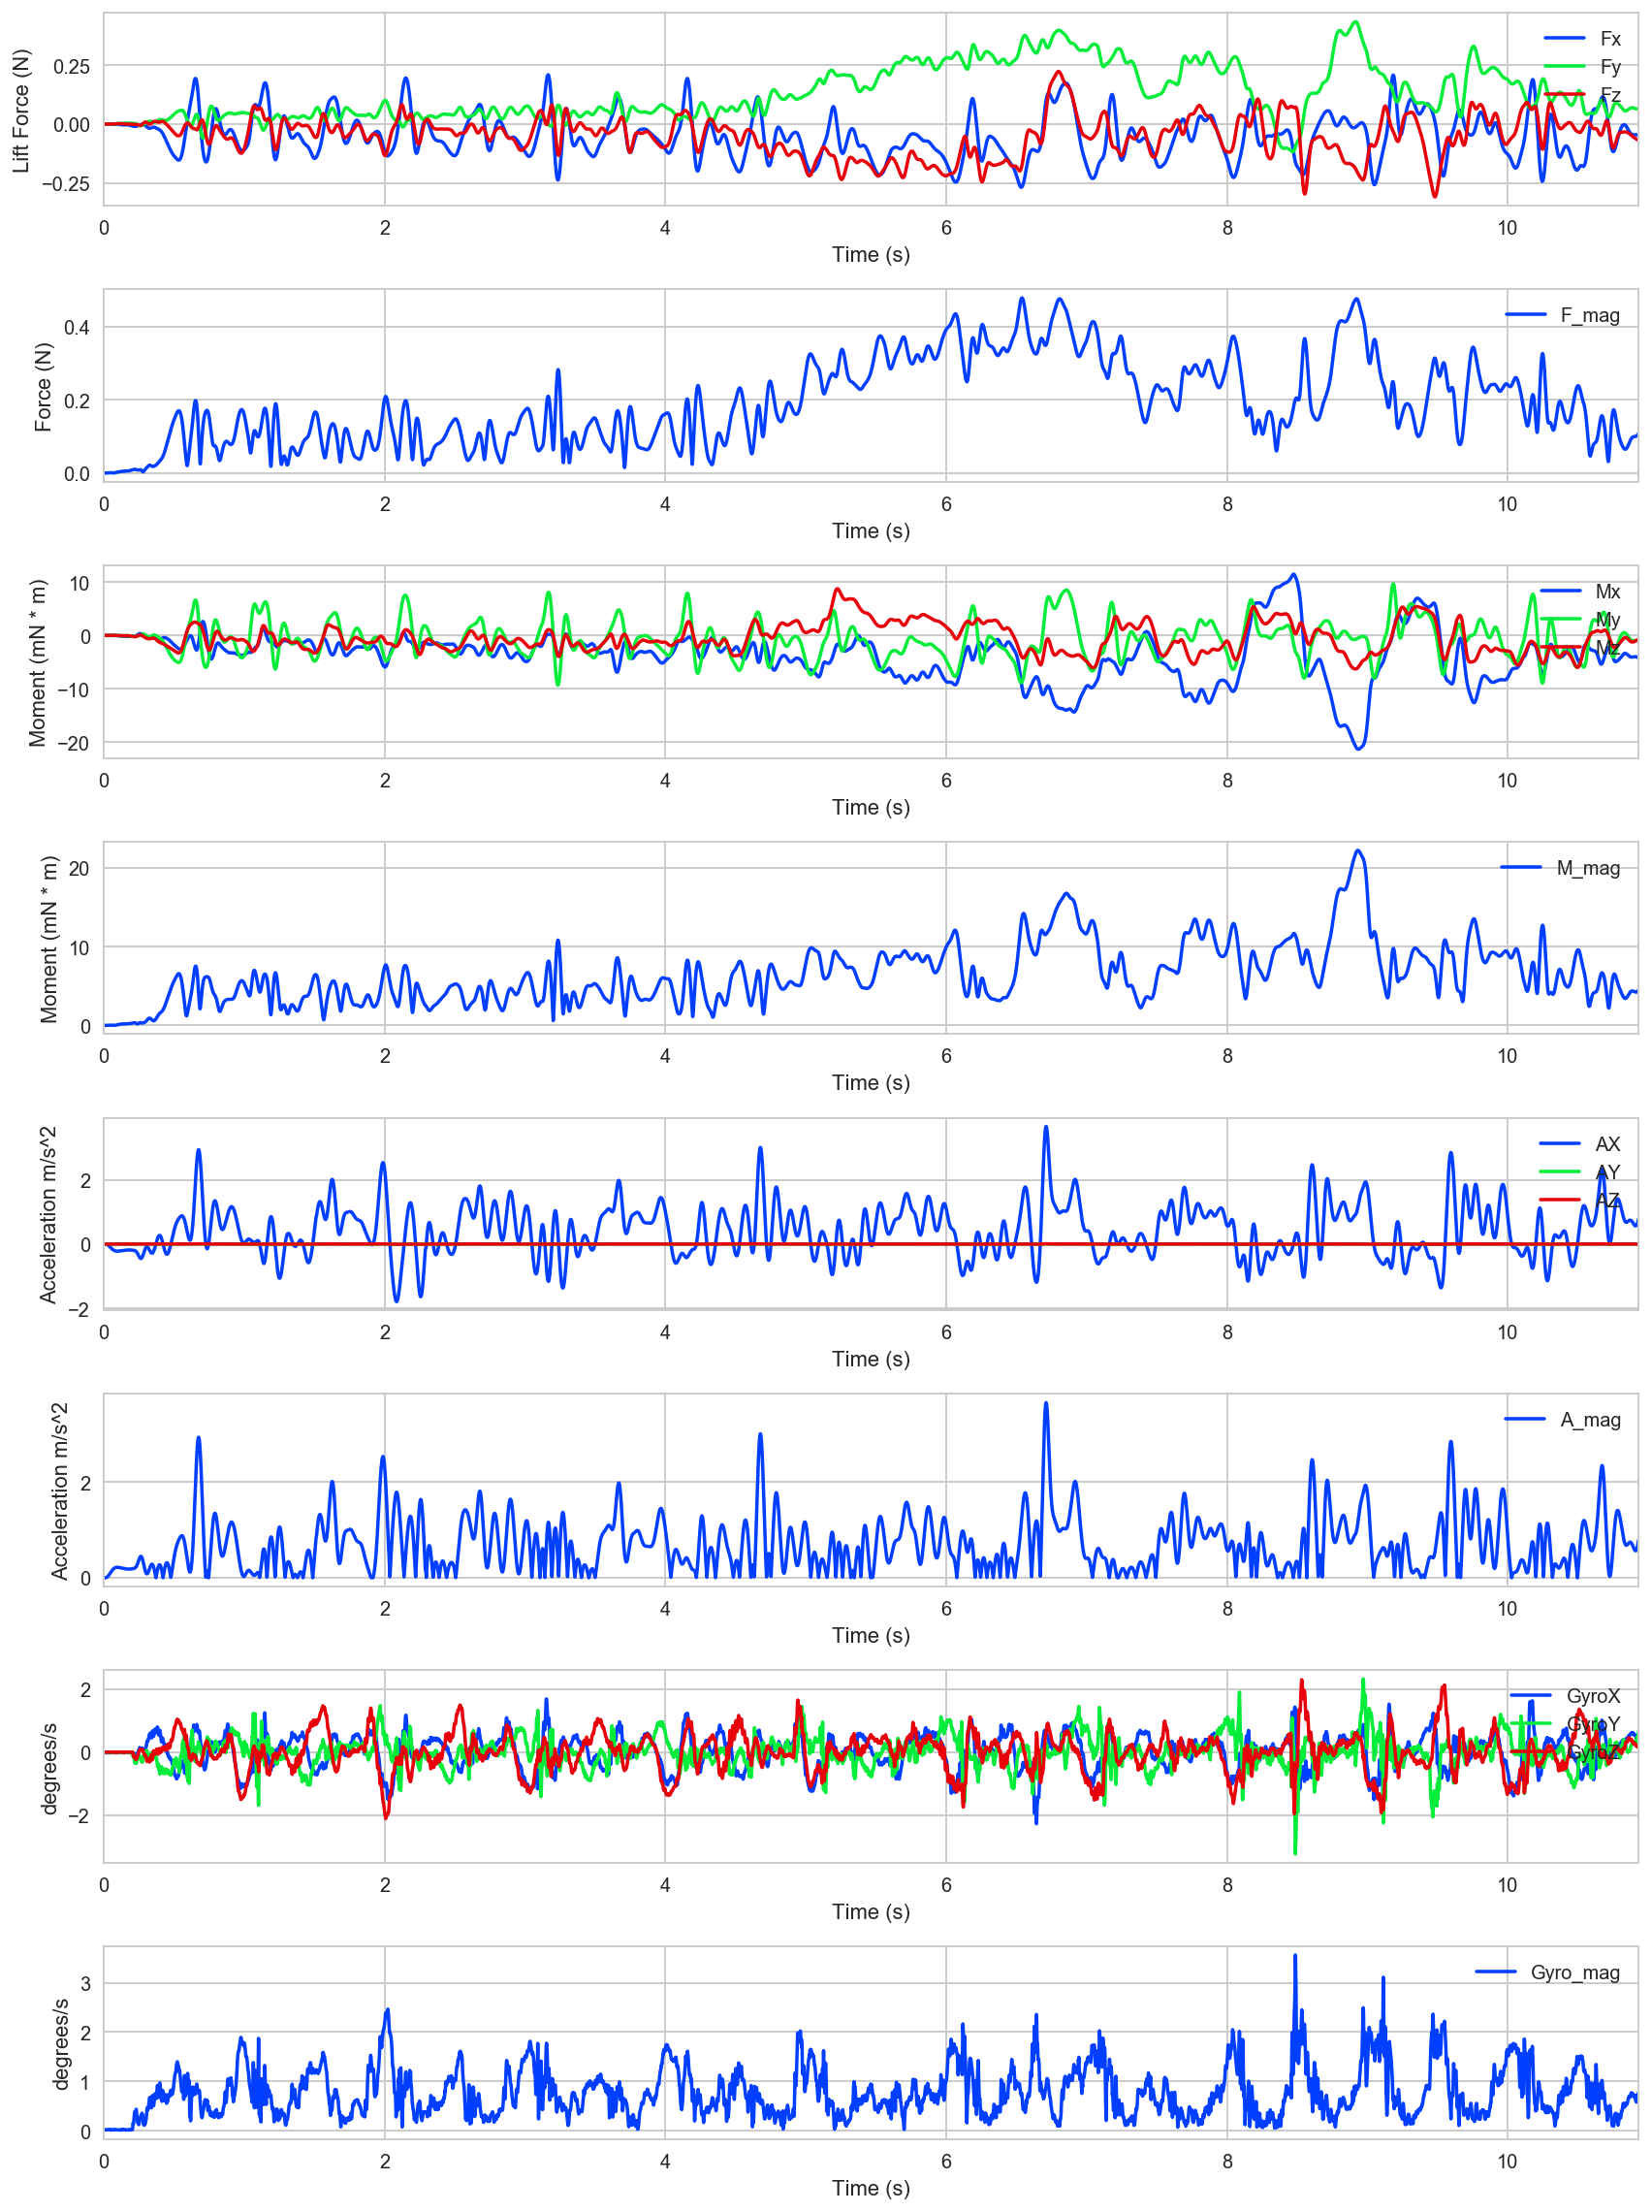

In [5]:
utils.plot_columns(df, [['Fx', 'Fy', 'Fz'], 'F_mag', ['Mx', 'My', 'Mz'], 'M_mag', ['AX', 'AY', 'AZ'], 'A_mag', ['GyroX', 'GyroY', 'GyroZ'], 'Gyro_mag'], display=True, save_figure=False)

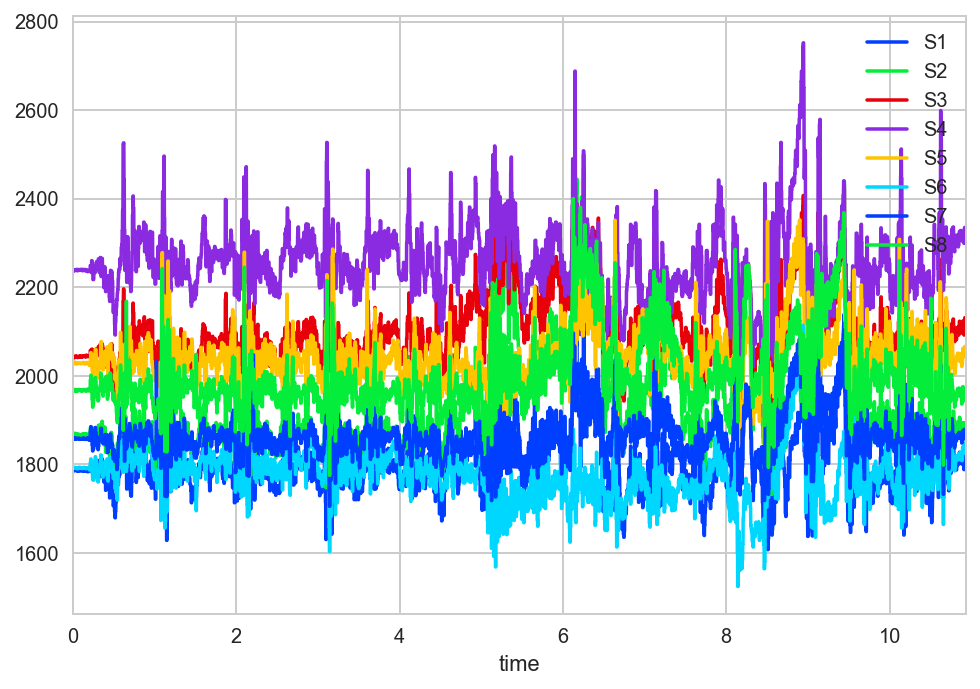

In [6]:
df.plot(x='time', y=['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8'])

In [7]:
drag = utils.calculate_drag_energy(df, has_bottom_shell=False,start_time=5890,end_time=8910)
print drag

drag energy (kg*cm^2/s^2): 165.620275006
0.0165620275006


In [8]:
electrical_energy_cont = utils.calculate_electrical_energy_cont(df, start_time=5890,end_time=8910)
electrical_energy = utils.calculate_electrical_energy(df, start_time=5890, end_time=8910)

electrical energy cont: 5.79387153139
electrical energy (Joules): 5.79518276645


In [21]:
import numpy as np
start = df['Right Leg Pos'][5500:6500].argmax()
end = df['Right Leg Pos'][9000:9500].argmax()
print start, end
print df['Right Leg Pos'][start]
print df['Right Leg Pos'][end]
starts = np.arange(start, end, step=1000)
ends = np.arange(start+1000, end+1000, step=1000)
intervals = np.vstack((starts, ends)).T
print intervals

5952 9499
6.2766661865
3.61674367778
[[5952 6952]
 [6952 7952]
 [7952 8952]
 [8952 9952]]


In [22]:
drags = utils.get_drag_energy_from_list(df, False, intervals)

drag energy (kg*cm^2/s^2): 41.2827095945
drag energy (kg*cm^2/s^2): 45.2487388206
drag energy (kg*cm^2/s^2): 34.0242887603
drag energy (kg*cm^2/s^2): 12.0307886373
